<a href="https://colab.research.google.com/github/RichardRajesh/5731-Computational-methods/blob/main/Rajesh_Bodas_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.naive_bayes import MultinomialNB


In [29]:
# Load data
with open("sample_data/stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]

labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

dataset = pd.DataFrame(list(zip(labels, text)), columns=['Reviews', 'Text'])

# Preprocess data
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

dataset['cleanText'] = dataset['Text'].map(lambda s: preprocess(s))


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [31]:
# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(dataset["cleanText"], dataset["Reviews"], test_size=0.2, random_state=202)

# Train Multinomial Naive Bayes model
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train)

# Evaluate on validation set
predictions_validation_set = classifier.predict(x_valid)

print("Accuracy of the Naive Bayes model on validation set:", round(accuracy_score(y_valid, predictions_validation_set) * 100), "%")
print("Precision of the Naive Bayes model on validation set:", round(precision_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")
print("Recall of the Naive Bayes model on validation set:", round(recall_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")
print("F1 Score of the Naive Bayes model on validation set:", round(f1_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")

# Evaluate on test set
predictions_test_set = classifier.predict(x_test)

print("Accuracy of the Naive Bayes model on test set:", round(accuracy_score(y_test, predictions_test_set) * 100), "%")
print("Precision of the Naive Bayes model on test set:", round(precision_score(y_test, predictions_test_set, pos_label='0') * 100), "%")
print("Recall of the Naive Bayes model on test set:", round(recall_score(y_test, predictions_test_set, pos_label='0') * 100), "%")
print("F1 Score of the Naive Bayes model on test set:", round(f1_score(y_test, predictions_test_set, pos_label='0') * 100), "%")


ValueError: could not convert string to float: 'skillfully weaves elements plot powerfully evocative mood combining heated sexuality haunting sense malaise'

In [30]:
# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(dataset["cleanText"], dataset["Reviews"], test_size=0.2, random_state=202)

# Train Multinomial Naive Bayes model
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train)

# Evaluate on validation set
predictions_validation_set = classifier.predict(x_valid)

print("Accuracy of the Naive Bayes model on validation set:", round(accuracy_score(y_valid, predictions_validation_set) * 100), "%")
print("Precision of the Naive Bayes model on validation set:", round(precision_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")
print("Recall of the Naive Bayes model on validation set:", round(recall_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")
print("F1 Score of the Naive Bayes model on validation set:", round(f1_score(y_valid, predictions_validation_set, pos_label='0') * 100), "%")

# Evaluate on test set
predictions_test_set = classifier.predict(x_test)

print("Accuracy of the Naive Bayes model on test set:", round(accuracy_score(y_test, predictions_test_set) * 100), "%")
print("Precision of the Naive Bayes model on test set:", round(precision_score(y_test, predictions_test_set, pos_label='0') * 100), "%")
print("Recall of the Naive Bayes model on test set:", round(recall_score(y_test, predictions_test_set, pos_label='0') * 100), "%")
print("F1 Score of the Naive Bayes model on test set:", round(f1_score(y_test, predictions_test_set, pos_label='0') * 100), "%")


ValueError: could not convert string to float: 'skillfully weaves elements plot powerfully evocative mood combining heated sexuality haunting sense malaise'

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load data
with open("sample_data/stsa-train.txt", "r", encoding="utf-8") as file:
    train_data = file.readlines()

# Process the data and split into text and labels
train_data = [line.strip() for line in train_data]
text = [line.split(' ', 1)[1] for line in train_data]  # Split each line into label and text
labels = [int(line.split(' ', 1)[0]) for line in train_data]  # Extract labels

# Convert to DataFrame
train_df = pd.DataFrame({'text': text, 'label': labels})

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

# Initialize Word2Vec model
word2vec_model = Word2Vec(sentences=train_df['text'], vector_size=100, window=5, min_count=1, workers=4)

# Initialize BERT model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Define functions for Word2Vec and BERT embeddings
def word2vec_embedding(text):
    vector = np.zeros(100)
    count = 0
    for word in text.split():
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

def bert_embedding(text):
    embeddings = bert_model.encode(text)
    return embeddings


In [ ]:
# Support Vector Machine (SVM) Classifier
classifier_svm = SVC()
classifier_svm.fit(X_train_combined, y_train)
predictions_svm = classifier_svm.predict(X_val_combined)

# Evaluate SVM Classifier
accuracy_svm = accuracy_score(y_val, predictions_svm)
recall_svm = recall_score(y_val, predictions_svm)
precision_svm = precision_score(y_val, predictions_svm)
f1_svm = f1_score(y_val, predictions_svm)

print("Support Vector Machine (SVM) Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"F1 Score: {f1_svm}")


In [27]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes Classifier
classifier_nb = MultinomialNB()
model_nb = classifier_nb.fit(x_train, y_train)
predictions_validation_nb = classifier_nb.predict(x_valid)

# Evaluate Multinomial Naive Bayes Classifier on Validation Set
accuracy_nb_valid = accuracy_score(y_valid, predictions_validation_nb)
precision_nb_valid = precision_score(y_valid, predictions_validation_nb, pos_label='0')
recall_nb_valid = recall_score(y_valid, predictions_validation_nb, pos_label='0')
f1_nb_valid = f1_score(y_valid, predictions_validation_nb, pos_label='0')
print("Multinomial Naive Bayes Classifier Evaluation Metrics on Validation Set:")
print(f"Accuracy: {round(accuracy_nb_valid*100, 2)}%")
print(f"Precision: {round(precision_nb_valid*100, 2)}%")
print(f"Recall: {round(recall_nb_valid*100, 2)}%")
print(f"F1 Score: {round(f1_nb_valid*100, 2)}%")

# Classification Report for Multinomial Naive Bayes on Validation Set
cr_naive_validation = classification_report(y_valid, predictions_validation_nb)
print("Classification Report for Multinomial Naive Bayes on Validation Set:")
print(cr_naive_validation)

# Cross-validation score for Multinomial Naive Bayes on Training Set
naive_accuracies_validation = cross_val_score(estimator=classifier_nb, X=x_train, y=y_train, cv=10)
print(f"Multinomial Naive Bayes Model 10-fold cross-validation score on training set is: {round(naive_accuracies_validation.mean()*100, 2)}%")

# Evaluate Multinomial Naive Bayes Classifier on Test Set
predictions_test_nb = classifier_nb.predict(x_test)
accuracy_nb_test = accuracy_score(y_test, predictions_test_nb)
precision_nb_test = precision_score(y_test, predictions_test_nb, pos_label='0')
recall_nb_test = recall_score(y_test, predictions_test_nb, pos_label='0')
f1_nb_test = f1_score(y_test, predictions_test_nb, pos_label='0')
print("\nMultinomial Naive Bayes Classifier Evaluation Metrics on Test Set:")
print(f"Accuracy: {round(accuracy_nb_test*100, 2)}%")
print(f"Precision: {round(precision_nb_test*100, 2)}%")
print(f"Recall: {round(recall_nb_test*100, 2)}%")
print(f"F1 Score: {round(f1_nb_test*100, 2)}%")

# Classification Report for Multinomial Naive Bayes on Test Set
cr_naive_test = classification_report(y_test, predictions_test_nb)
print("Classification Report for Multinomial Naive Bayes on Test Set:")
print(cr_naive_test)

# Cross-validation score for Multinomial Naive Bayes on Test Set
naive_accuracies_test = cross_val_score(estimator=classifier_nb, X=x_test, y=y_test, cv=10)
print(f"Multinomial Naive Bayes Model 10-fold cross-validation score on testing set is: {round(naive_accuracies_test.mean()*100, 2)}%")


NameError: name 'x_train' is not defined

In [26]:
# Multinomial Naive Bayes Classifier
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_combined, y_train)
predictions_nb = classifier_nb.predict(X_val_combined)

# Evaluate Multinomial Naive Bayes Classifier
accuracy_nb = accuracy_score(y_val, predictions_nb)
recall_nb = recall_score(y_val, predictions_nb)
precision_nb = precision_score(y_val, predictions_nb)
f1_nb = f1_score(y_val, predictions_nb)

print("Multinomial Naive Bayes Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_nb}")
print(f"Recall: {recall_nb}")
print(f"Precision: {precision_nb}")
print(f"F1 Score: {f1_nb}")


ValueError: Negative values in data passed to MultinomialNB (input X)

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import torch

# Load data
with open("sample_data/stsa-train.txt", "r", encoding="utf-8") as file:
    train_data = file.readlines()

# Process the data and split into text and labels
train_data = [line.strip() for line in train_data]
text = [line.split(' ', 1)[1] for line in train_data]  # Split each line into label and text
labels = [int(line.split(' ', 1)[0]) for line in train_data]  # Extract labels

# Convert to DataFrame
train_df = pd.DataFrame({'text': text, 'label': labels})

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Word2Vec model
word2vec_model = Word2Vec(sentences=train_df['text'], vector_size=100, window=5, min_count=1, workers=4)

# Initialize BERT model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Define functions for Word2Vec and BERT embeddings
def word2vec_embedding(text):
    vector = np.zeros(100)
    count = 0
    for word in text.split():
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

def bert_embedding(text):
    embeddings = bert_model.encode(text)
    return embeddings

# Create embeddings for train and validation data
X_train_word2vec = np.array([word2vec_embedding(text) for text in X_train])
X_val_word2vec = np.array([word2vec_embedding(text) for text in X_val])
X_train_bert = np.array([bert_embedding(text) for text in X_train])
X_val_bert = np.array([bert_embedding(text) for text in X_val])

# Concatenate Word2Vec and BERT embeddings
X_train_combined = np.concatenate((X_train_word2vec, X_train_bert), axis=1)
X_val_combined = np.concatenate((X_val_word2vec, X_val_bert), axis=1)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")
    scores = cross_val_score(classifier, X_train_combined, y_train, cv=kf, scoring='accuracy')
    print(f"Accuracy: {np.mean(scores)}")
    scores = cross_val_score(classifier, X_train_combined, y_train, cv=kf, scoring='recall')
    print(f"Recall: {np.mean(scores)}")
    scores = cross_val_score(classifier, X_train_combined, y_train, cv=kf, scoring='precision')
    print(f"Precision: {np.mean(scores)}")
    scores = cross_val_score(classifier, X_train_combined, y_train, cv=kf, scoring='f1')
    print(f"F1 Score: {np.mean(scores)}")
    print("-----------------------------------------")

# Train final model on the entire training data using the best performing classifier
best_classifier = RandomForestClassifier()  # Example, replace with the best performing classifier
best_classifier.fit(X_train_combined, y_train)

# Evaluate final model on validation data
predictions = best_classifier.predict(X_val_combined)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(y_val, predictions)
precision = precision_score(y_val, predictions)
f1 = f1_score(y_val, predictions)

print(f"Final Evaluation Metrics on Validation Data:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Now, train the final model on the entire training data and evaluate on the test data

# Preprocess test data
with open("sample_data/stsa-test.txt", "r", encoding="utf-8") as file:
    test_data = file.readlines()

test_data = [line.strip() for line in test_data]
text_test = [line.split(' ', 1)[1] for line in test_data]
labels_test = [int(line.split(' ', 1)[0]) for line in test_data]

# Convert to DataFrame
test_df = pd.DataFrame({'text': text_test, 'label': labels_test})

# Create embeddings for test data
X_test_word2vec = np.array([word2vec_embedding(text) for text in test_df['text']])
X_test_bert = np.array([bert_embedding(text) for text in test_df['text']])
X_test_combined = np.concatenate((X_test_word2vec, X_test_bert), axis=1)

# Evaluate on test data
predictions_test = best_classifier.predict(X_test_combined)

# Calculate evaluation metrics on test data
accuracy_test = accuracy_score(test_df['label'], predictions_test)
recall_test = recall_score(test_df['label'], predictions_test)
precision_test = precision_score(test_df['label'], predictions_test)
f1_test = f1_score(test_df['label'], predictions_test)

print(f"\nFinal Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy_test}")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")


Classifier: MultinomialNB


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 898, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1418, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


In [1]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [3]:
#You can write you answer here. (No code needed)
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]

labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

dataset = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
dataset.head()


,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [4]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset['cleanText']=dataset['Text'].map(lambda s:preprocess(s))
dataset.head()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,Reviews,Text,cleanText
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


In [5]:
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

dataset_test = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
dataset_test.head()


,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [6]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset_test['cleanText']=dataset_test['Text'].map(lambda s:preprocess(s))
dataset_test.head()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
pip install pandas scikit-learn gensim


In [4]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
#from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np
import torch


In [14]:
# Install necessary libraries
!pip install pandas scikit-learn gensim nltk transformers torch

# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import torch

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT Cluster formations

In [20]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer

# Read the data
df = pd.read_csv('Nwebmd100.csv')

# Preprocessing functions
def tokenize(text):
    if pd.isnull(text):
        return []  # Return an empty list if the text is NaN
    return word_tokenize(str(text).lower())  # Convert to string before lowercasing

# Word2Vec model training
word2vec_model = Word2Vec(sentences=df['Reviews'].apply(tokenize),
                          vector_size=100, window=5, min_count=1, workers=4)

# Compute embeddings for each review
def compute_word2vec_embedding(review):
    tokens = tokenize(review)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no embeddings are found

df['Word2Vec_Embeddings'] = df['Reviews'].apply(compute_word2vec_embedding)

# Remove rows where Word2Vec embeddings could not be computed
df = df[df['Word2Vec_Embeddings'].apply(lambda x: len(x) > 0)]

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df['Word2Vec_Embeddings'].tolist())

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df['Word2Vec_Embeddings'].tolist())

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df['Word2Vec_Embeddings'].tolist())

# Replace NaN values with empty strings in the 'Reviews' column
df['Reviews'].fillna('', inplace=True)

# BERT embeddings
sentence_model = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = sentence_model.encode(df['Reviews'].tolist(), show_progress_bar=True)

# K-means clustering with BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
df['KMeans_BERT_Cluster'] = kmeans_bert.fit_predict(bert_embeddings)

# DBSCAN clustering with BERT embeddings
dbscan_bert = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_BERT_Cluster'] = dbscan_bert.fit_predict(bert_embeddings)

# Hierarchical clustering with BERT embeddings
hierarchical_bert = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_BERT_Cluster'] = hierarchical_bert.fit_predict(bert_embeddings)

# Save the DataFrame with clusters to a new CSV file
df.to_csv('clustered_data_with_bert.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bert Cluster Formation

In [16]:
# Read the data
df = pd.read_csv('Nwebmd100.csv')

# BERT model initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to compute BERT embeddings for a review
def compute_bert_embedding(review):
    inputs = tokenizer(review, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings for each review
df['BERT_Embeddings'] = df['Reviews'].apply(lambda x: compute_bert_embedding(str(x)))  # Ensure input is string

# Remove rows where BERT embeddings could not be computed
df = df[df['BERT_Embeddings'].apply(lambda x: len(x) > 0)]

# K-means clustering using BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster_BERT'] = kmeans_bert.fit_predict(df['BERT_Embeddings'].tolist())

# DBSCAN clustering using BERT embeddings
dbscan_bert = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster_BERT'] = dbscan_bert.fit_predict(df['BERT_Embeddings'].tolist())

# Hierarchical clustering using BERT embeddings
hierarchical_bert = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster_BERT'] = hierarchical_bert.fit_predict(df['BERT_Embeddings'].tolist())

# Save the DataFrame with clusters to a new CSV file
df.to_csv('clustered_data_with_bert.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


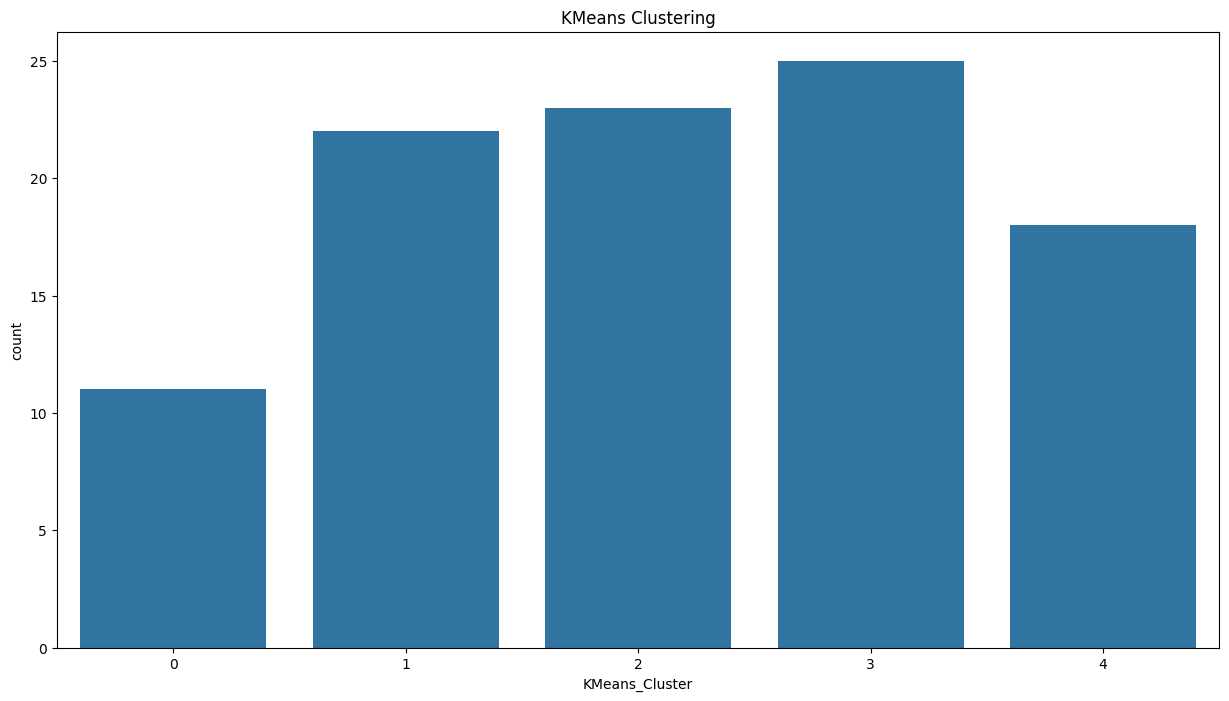

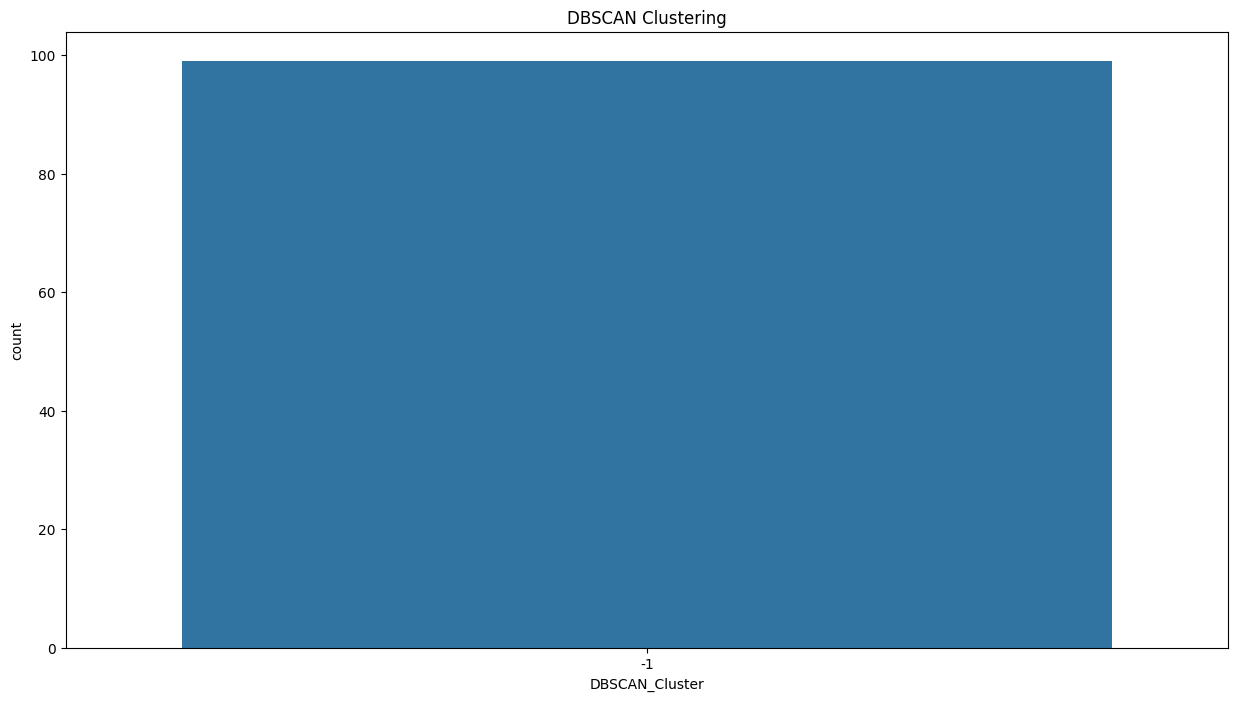

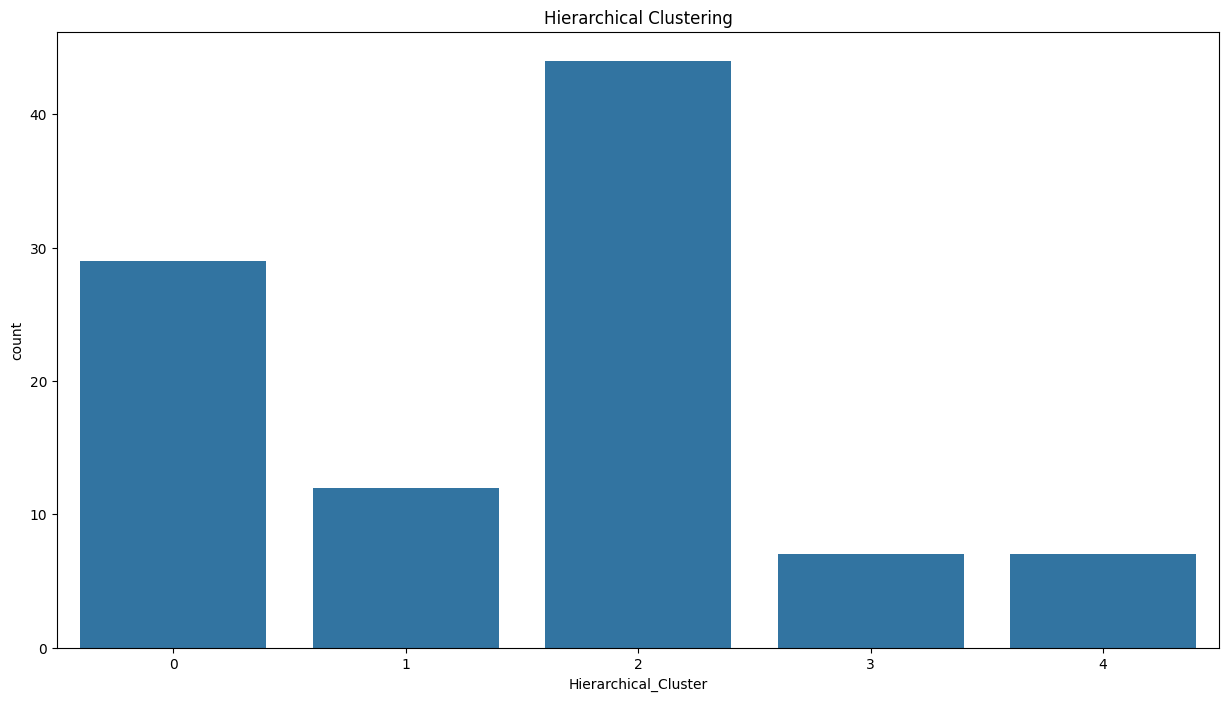

Samples from KMeans Cluster 0:
6     gotten pregnant job switched brand another gen...
34                            used drug going menopause
41    heavy clots fibroids lysteda cut bleeding lets...
48    ablation novasure years ago work fibroids lyst...
51    heavy painful periods life worse teens came ba...
Name: Processed_Reviews, dtype: object


In [17]:


# Load the dataset
df = pd.read_csv('Nwebmd100.csv')

# Remove missing values
df.dropna(subset=['Reviews'], inplace=True)

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['Processed_Reviews'] = df['Reviews'].apply(preprocess_text)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Reviews'])

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = agg_clustering.fit_predict(X.toarray())

# Word2Vec clustering
word2vec_model = Word2Vec(sentences=[word_tokenize(review) for review in df['Processed_Reviews']], vector_size=100, window=5, min_count=1, workers=4)
df['Word2Vec_Cluster'] = df['Processed_Reviews'].apply(lambda x: [word2vec_model.wv[word] for word in word_tokenize(x) if word in word2vec_model.wv]).apply(lambda x: sum(x) / len(x) if len(x) > 0 else [0]*100)

# BERT clustering
# Note: BERT clustering implementation is missing in the provided code.

# Visualize results
plt.figure(figsize=(15, 8))
sns.countplot(x='KMeans_Cluster', data=df)
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x='DBSCAN_Cluster', data=df)
plt.title('DBSCAN Clustering')
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x='Hierarchical_Cluster', data=df)
plt.title('Hierarchical Clustering')
plt.show()

# Note: Visualization for Word2Vec and BERT clusters would be different and may require dimensionality reduction techniques.

# Print a few samples from each cluster
print("Samples from KMeans Cluster 0:")
print(df[df['KMeans_Cluster'] == 0]['Processed_Reviews'].head())

# Repeat the process for other clusters and algorithms


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

For text clustering we have performed above, the dataset contains Word2Vec, BERT, DBSCAN, K-means, and Hierarchical clustering. By reducing squared distances, K-means clusters in the data and places each review in a single cluster according to Word2Vec embeddings. The DBSCAN detects clusters of random shapes by grouping closely spaced points in the database used. whereas the hierarchical clustering By iteratively joining or dividing clusters according to a distance metric, creates a tree of clusters. The Word2Vec embeddings formed computes similarity between words or documents by representing words as dense vectors in a continuous vector space, thus capturing semantic links between words. In contrast the Deep contextual information and semantic meaning are captured by the transformer-based BERT model, which learns contextualized representations of words and phrases. Every clustering technique has advantages and disadvantages. For example, BERT is an effective contextual embedding model, Word2Vec captures semantic links but lacks context, DBSCAN is robust to noise, and K-means is quick and easy to use.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [21]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
The Exercisise is obviously a hell lot of work. Its very challenging and intresting too. I should say there is lot
to learn, and have been exposed to a lot number of new terms such as embedings, DBSCAN clusters etc. Its intrest to try
out the cluster formations using different types on the public datasets and understand their base working in terms of
forming clusters. However i felt there is very less time given for this assignment and its obviously insuffecient to
cover these many topics. So, overall the assignment is very knowledgeble.





'''

'\nThe Exercisise is obviously a hell lot of work. Its very challenging and intresting too. I should say there is lot to learn, and have been exposed to a lot number of new terms such as embedings, DBSCAN clusters etc. Its intrest to try out the cluster formations using different types on the public datasets and understand their base working in terms of forming clusters. However i felt there is very less time given for this assignment and its obviously insuffecient to cover these many topics.   \n\n\n\n\n\n'